### Step 1 - Importing the required libraries for analysis and model building

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

### Reading and Analyzing the Data 

In [3]:
df=pd.read_csv("day.csv",header=0)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Checking the data for null and duplicate values

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


In [8]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

In [10]:
df=df.drop(["instant","dteday","casual","registered"],axis=1)
df.shape

(730, 12)

In [11]:
num_cols=["temp","atemp","hum","windspeed","cnt"]

#### EDA - Univariate Analysis

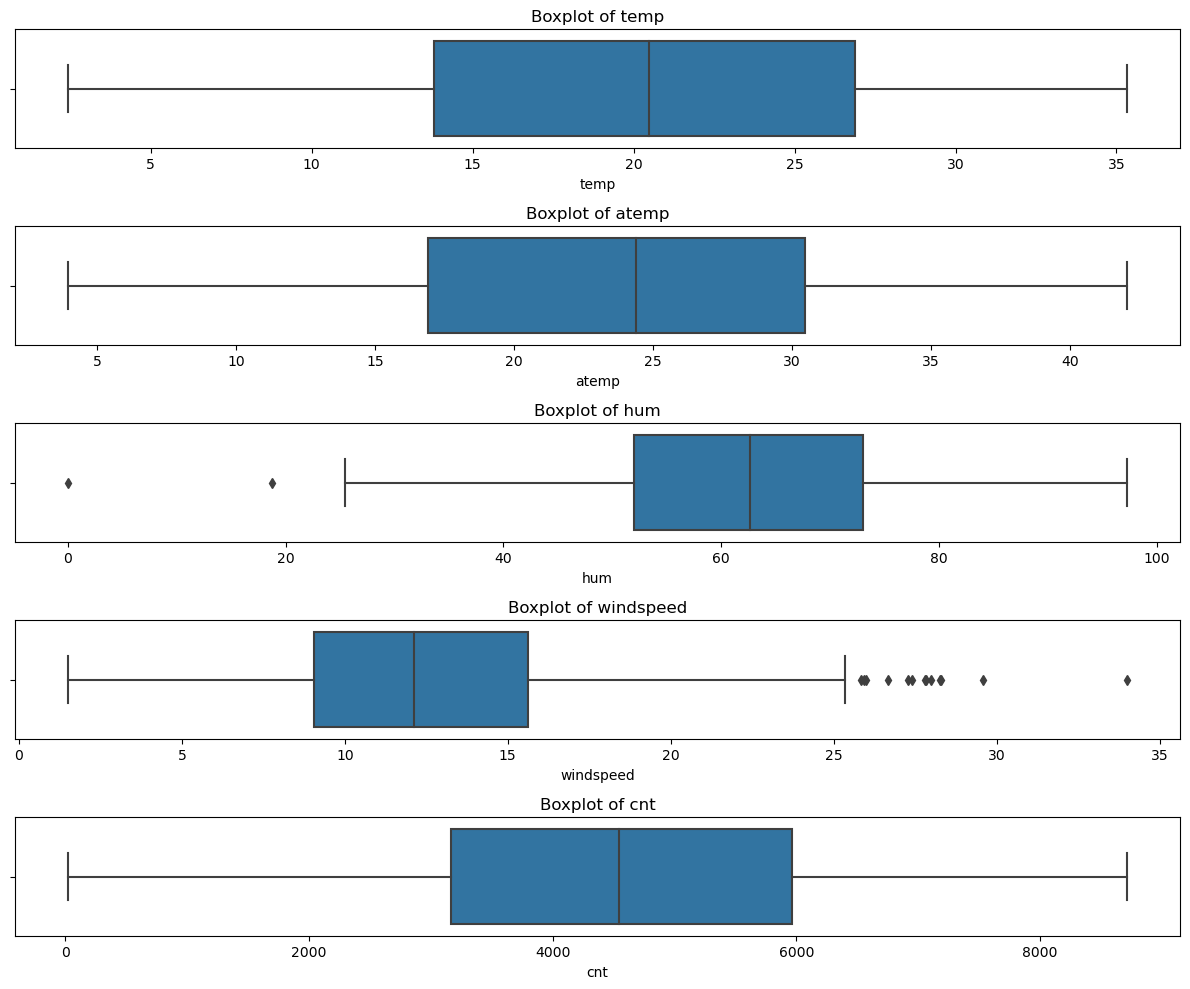

In [12]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

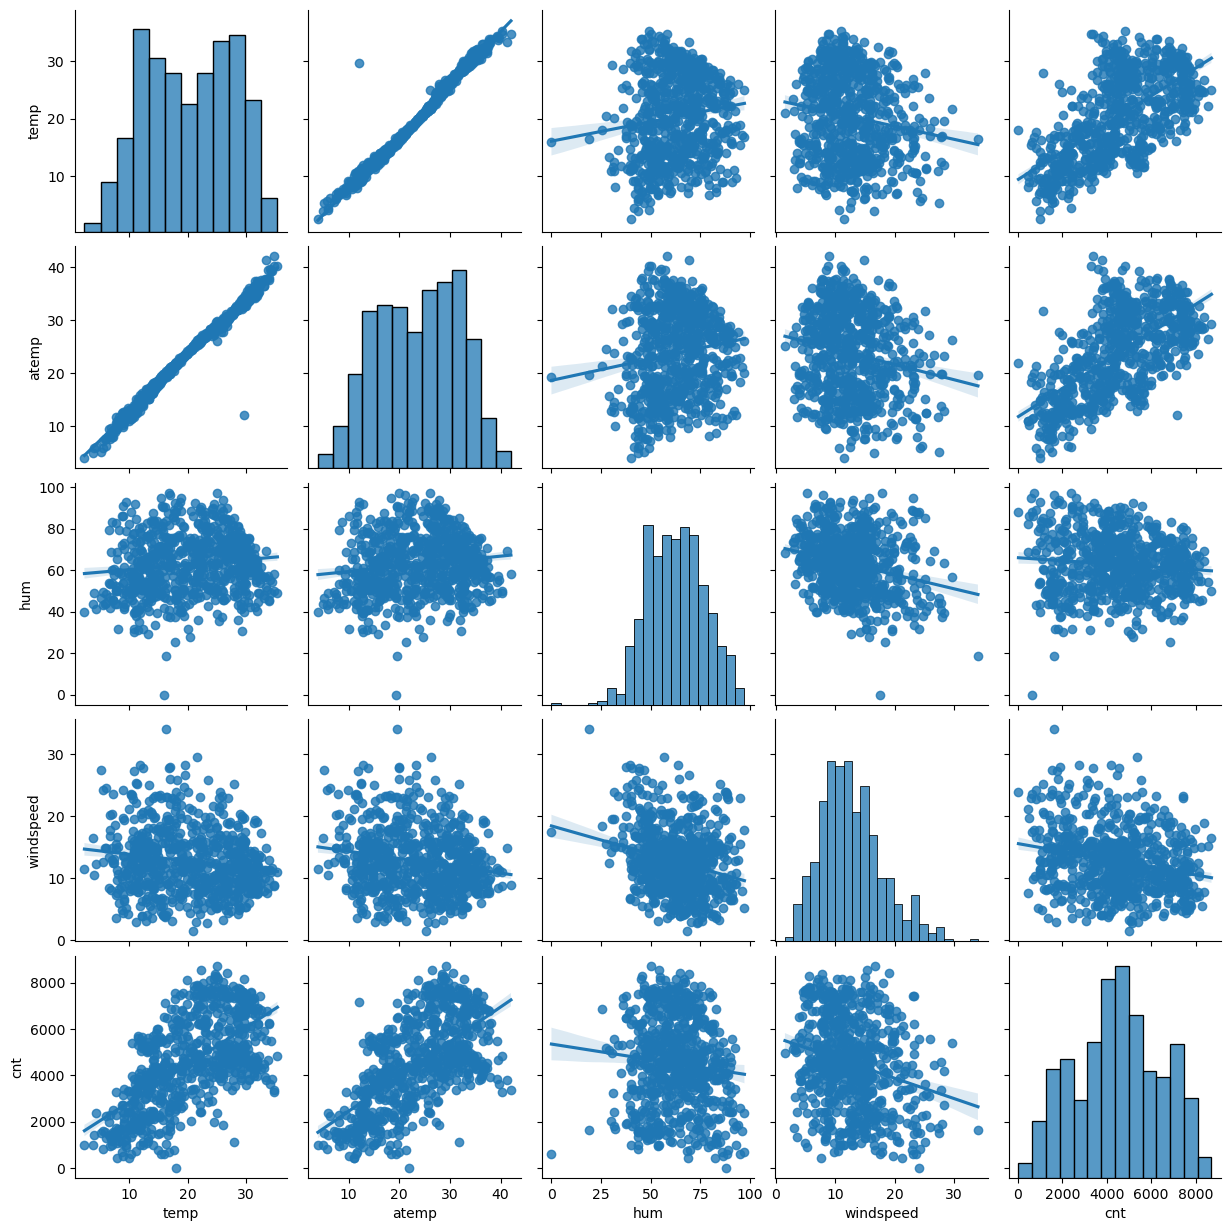

In [13]:
# Lets plot pairplots to have better to see if cnt is linearly  depend upon is independet variables. 
# visualising numerical values
sns.pairplot(data=df,vars=num_cols,kind="reg")
plt.show()

#### Bi-variate Analysis

In [14]:
def bar_plots(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y="cnt", data=df)
    df['year'] = df['yr'].astype(str)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y="cnt",hue="year", data=df,palette="Set1")
    plt.title(f'bar plot of {column} vs cnt(2018 vs 2019)')
    plt.legend(title="yr",labels=['2018','2019'])

    plt.tight_layout()
    plt.show()

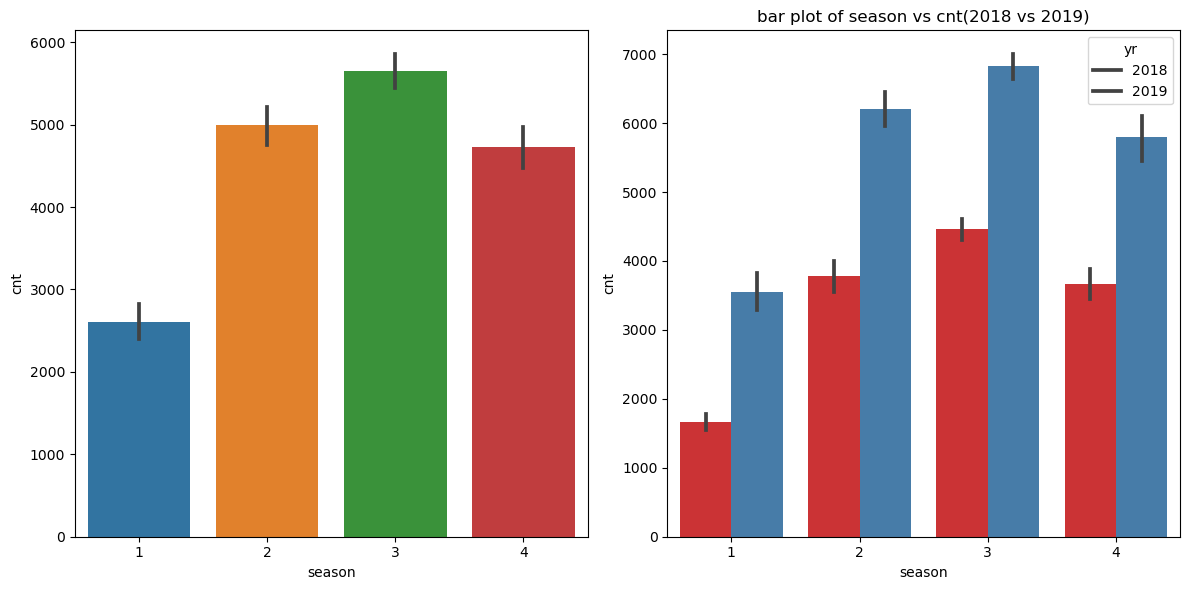

In [15]:
bar_plots("season")

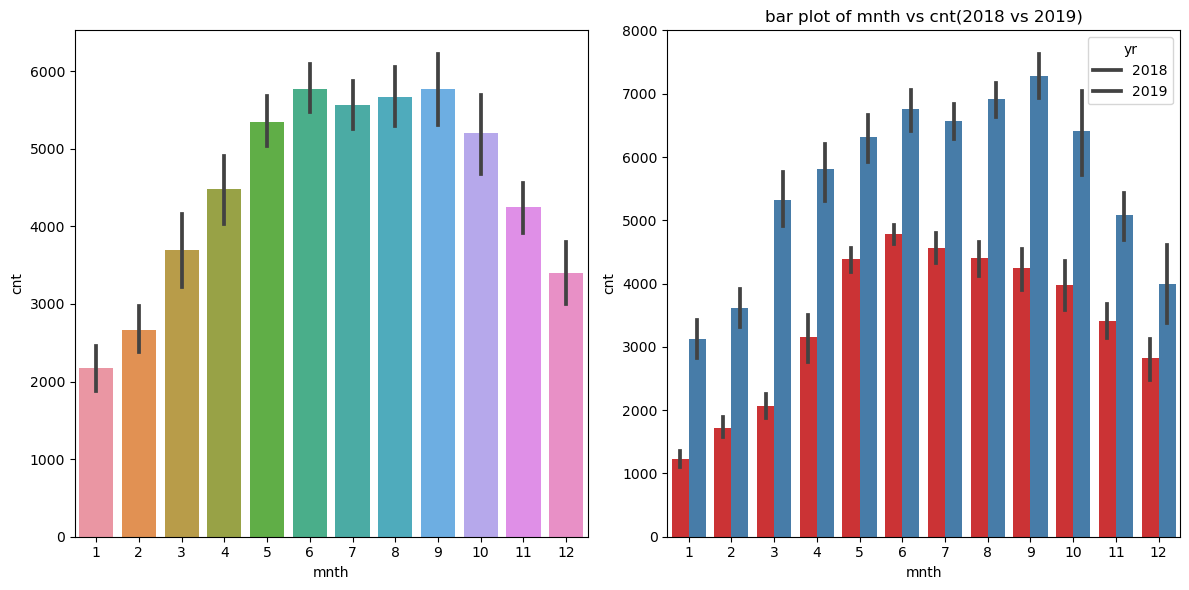

In [16]:
bar_plots("mnth")

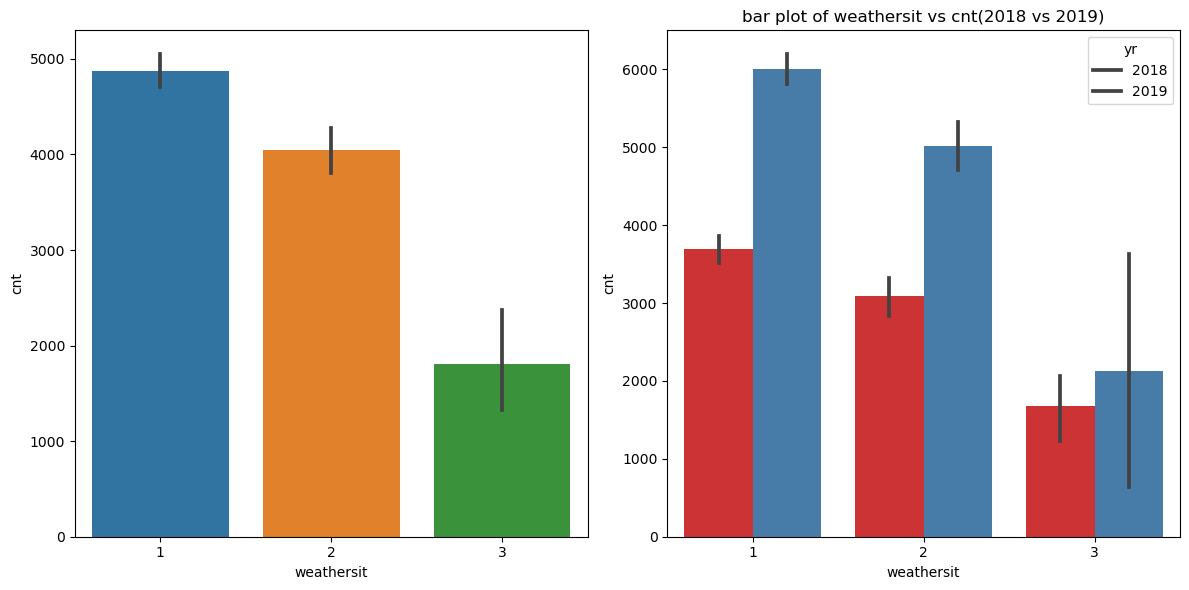

In [17]:
bar_plots("weathersit")

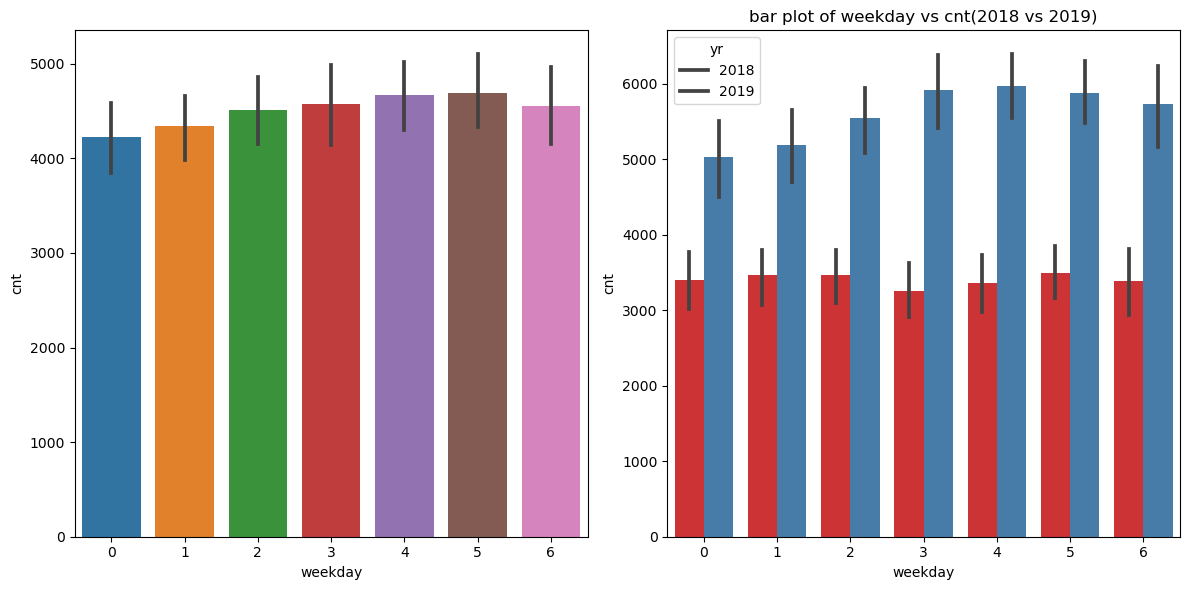

In [18]:
bar_plots("weekday")

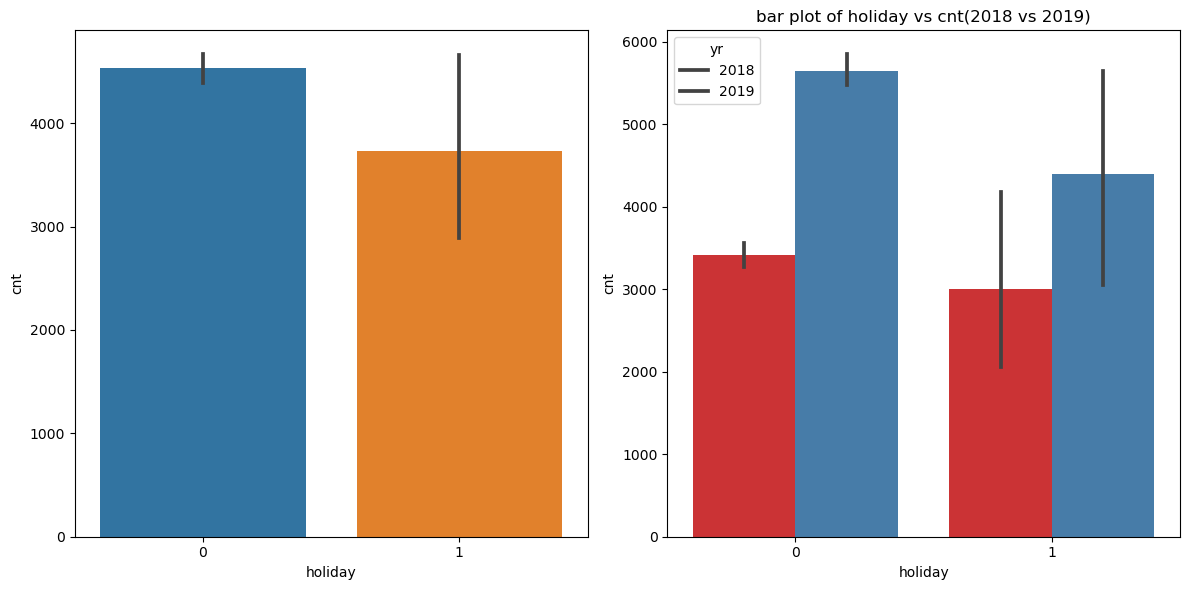

In [19]:
bar_plots("holiday")

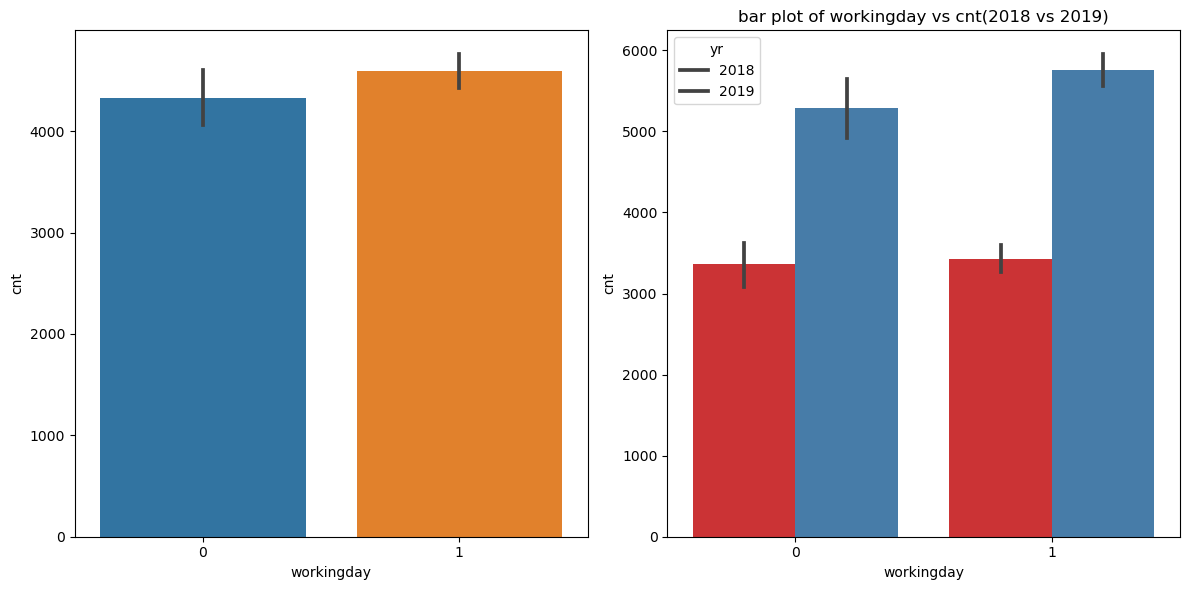

In [20]:
bar_plots("workingday")

#### Checking HeatMap to identify is there any correlation.

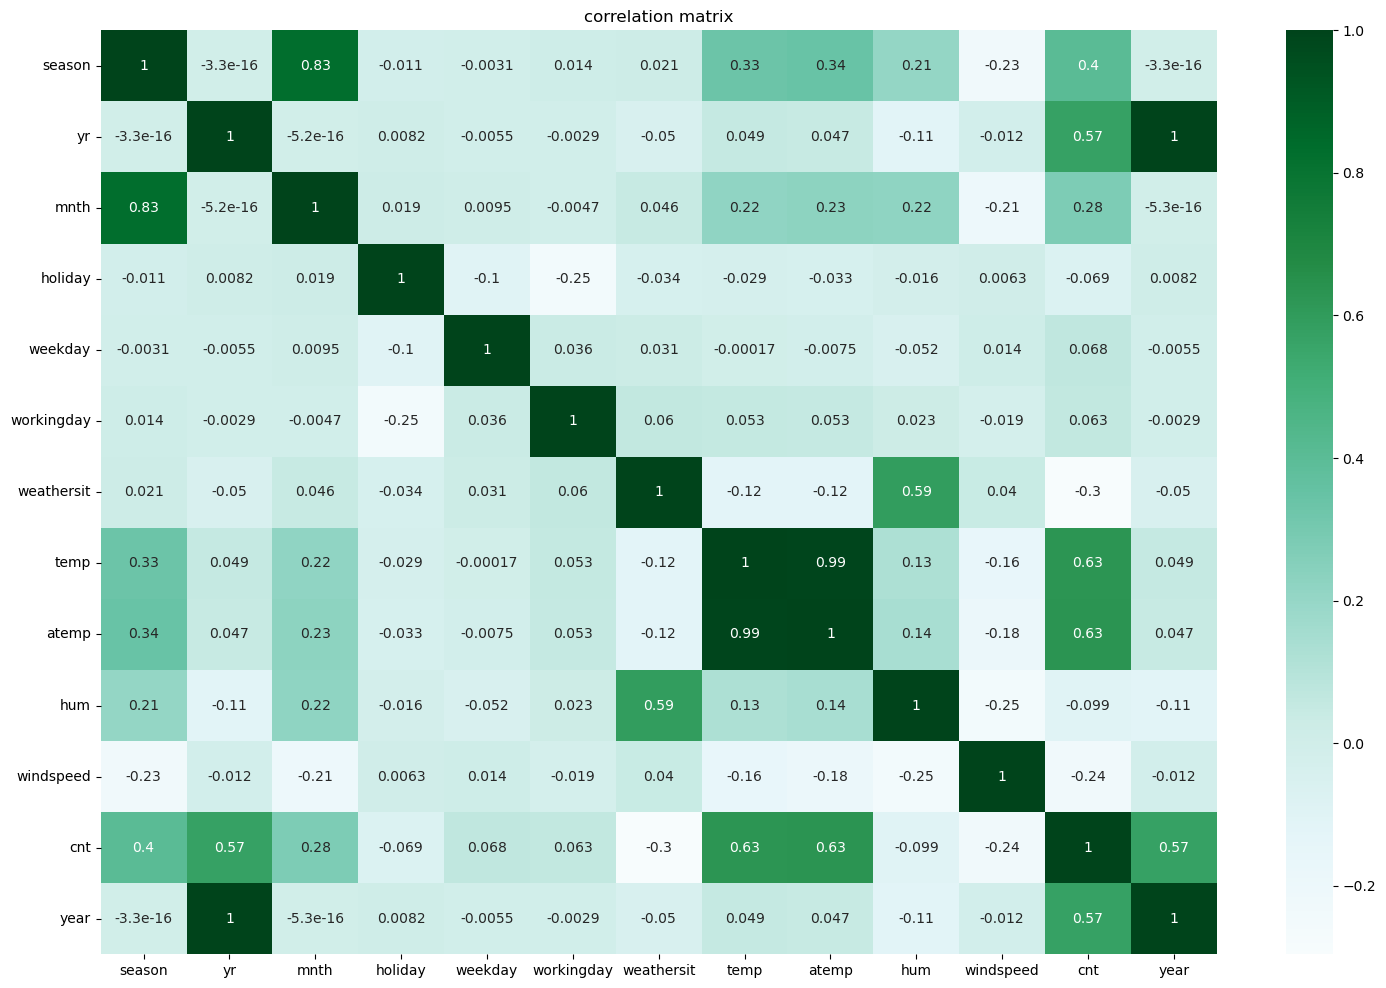

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix,annot=True,cmap="BuGn")
plt.title("correlation matrix")
plt.show()

### Data preparation

In [22]:
# Encoding the values 
df["weathersit"]=df["weathersit"].map({1:"Clear",2:"Mist",3:"Light Rain",4:"Heavy Rain"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0
2,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


In [23]:
df["weekday"]=df["weekday"].map({0:"sun",1:"mon",2:"tues",3:"wed",4:"thur",5:"fri",6:"sat"})
df["mnth"]=df["mnth"].map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})
df["season"]=df["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,jan,0,tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


#### we need to create a dummy variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [24]:
## dropping a redundant dummy var
weathersit = pd.get_dummies(df['weathersit'],dtype=int,drop_first=True)
weathersit.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [25]:
month=pd.get_dummies(df["mnth"],dtype=int,drop_first=True)
season=pd.get_dummies(df["season"],dtype=int,drop_first=True)
weekdays=pd.get_dummies(df["weekday"],dtype=int,drop_first=True)

In [26]:
df=pd.concat([df,weathersit,weekdays,season,month],axis=1)

In [27]:
df.shape

(730, 35)

In [28]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'year',
       'Light Rain', 'Mist', 'mon', 'sat', 'sun', 'thur', 'tues', 'wed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  year        730 non-null    object 
 13  Light Rain  730 non-null    int64  
 14  Mist        730 non-null    int64  
 15  mon         730 non-null    int64  
 16  sat         730 non-null    int64  
 17  sun         730 non-null    int64  
 18  thur        730 non-null    int64  
 19  tues        730 non-null    i

In [30]:
df.drop(["year","weathersit","season","mnth","weekday"],axis=1,inplace=True) #drop year column also which we created while plotting the graphs
df.shape

(730, 30)

#### Splitting the data into train and test sets

In [31]:
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100) #np.random.seed(0) use this command before splitting as the values might change while splitting. running this command will keep the values constant even when running multiple times

In [32]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Scaling numeric variables

In [33]:
scaler=MinMaxScaler()

In [34]:
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Mist,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Plotting a correlation matrix

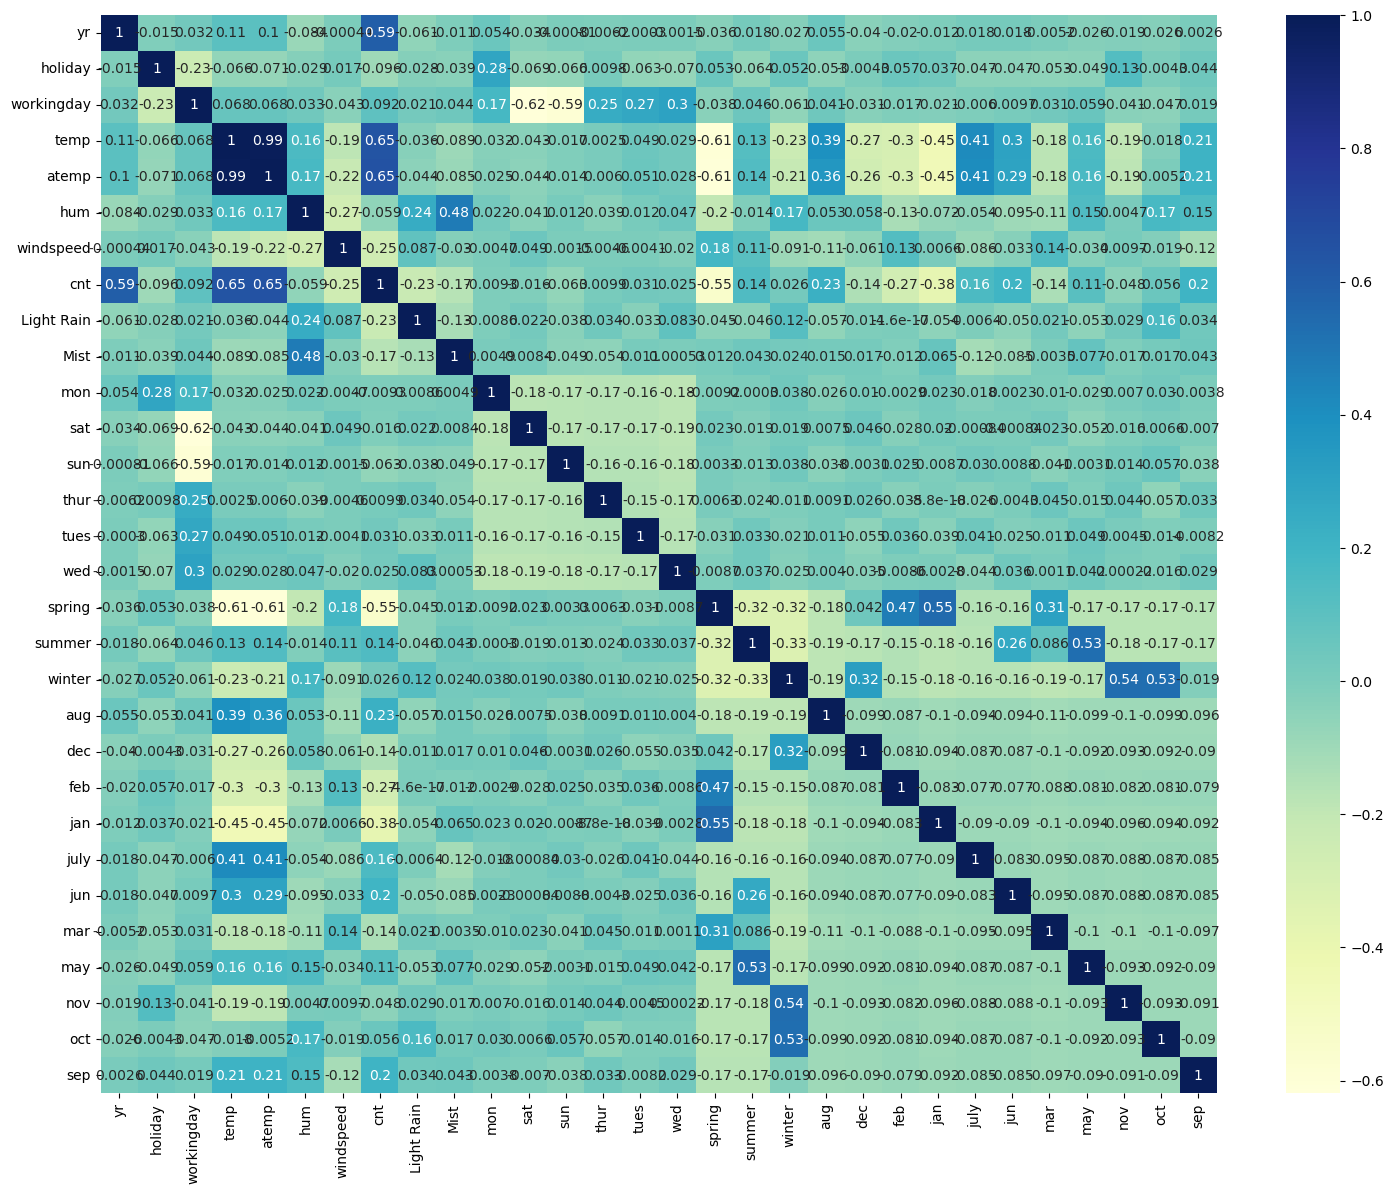

In [36]:
plt.figure(figsize = (18, 14))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
df_train_copy=df_train.copy()

In [38]:
df_train_copy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Rain,Mist,...,dec,feb,jan,july,jun,mar,may,nov,oct,sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_train=df_train.pop("cnt")

In [40]:
X_train=df_train

#### Building linear regression model

In [41]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [42]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thur', False, 11),
 ('tues', False, 10),
 ('wed', False, 12),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1)]

In [43]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Light Rain',
       'Mist', 'sat', 'spring', 'summer', 'winter', 'jan', 'july', 'sep'],
      dtype='object')

In [44]:
X_train.shape

(510, 29)

In [45]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mon', 'sun', 'thur', 'tues', 'wed', 'aug', 'dec', 'feb',
       'jun', 'mar', 'may', 'nov', 'oct'],
      dtype='object')

In [46]:
X_train_lm_1=X_train[col]

In [47]:
#add constant
X_train_lm_1=sm.add_constant(X_train_lm_1)

In [48]:
lm=sm.OLS(y_train,X_train_lm_1).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.22e-191
Time:                        07:39:58   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [50]:
#p-values of all the columns are within the p-value of 0.05 

In [51]:
def calculate_vif(df):
    vif=pd.DataFrame()
    X=df
    vif["Feature"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return vif

In [52]:
# calculating vif values for first model

In [53]:
calculate_vif(X_train_lm_1)

,Feature,VIF
0,const,84.60
10,spring,5.08
4,temp,3.89
12,winter,3.59
11,summer,2.65
5,hum,1.91
3,workingday,1.88
9,sat,1.78
8,Mist,1.57
13,jan,1.57


#### Building second linear regression model

In [54]:
X_train_lm_2=X_train_lm_1.drop(["spring"],axis=1)

In [55]:
X_train_lm_2=sm.add_constant(X_train_lm_2)

In [56]:
lm=sm.OLS(y_train,X_train_lm_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.98e-191
Time:                        07:39:58   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.030      6.739      0.0

In [57]:
calculate_vif(X_train_lm_2)

,Feature,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
9,sat,1.78
8,Mist,1.56
12,jan,1.55
11,winter,1.53
13,july,1.43
10,summer,1.41


#### Building third linear regression model

In [58]:
X_train_lm_3=X_train_lm_2.drop(["const"],axis=1)

In [59]:
X_train_lm3=sm.add_constant(X_train_lm_3)
lm=sm.OLS(y_train,X_train_lm3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Tue, 28 May 2024   Prob (F-statistic):          5.98e-191
Time:                        07:39:59   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2011      0.030      6.739      0.0

In [60]:
calculate_vif(X_train_lm3)

,Feature,VIF
0,const,57.07
4,temp,2.07
5,hum,1.89
3,workingday,1.88
9,sat,1.78
8,Mist,1.56
12,jan,1.55
11,winter,1.53
13,july,1.43
10,summer,1.41


In [61]:
lm.params

const         0.201084
yr            0.229383
holiday      -0.059602
workingday    0.043697
temp          0.567564
hum          -0.165855
windspeed    -0.193489
Light Rain   -0.243321
Mist         -0.054144
sat           0.053853
summer        0.075704
winter        0.125538
jan          -0.039348
july         -0.044250
sep           0.092822
dtype: float64

#### We can consider the above model i.e lm3, as it seems to have very low multi collinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-statistics value of 194.6 (which is greater than 1) and the p-value of 5.98e-191 is almost equal to zero suggests that the overall model is significant

#### Residual Analysis of the train data 
So, now to check if the error terms are also normally distributed(which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [63]:
y_train_cnt=lm.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

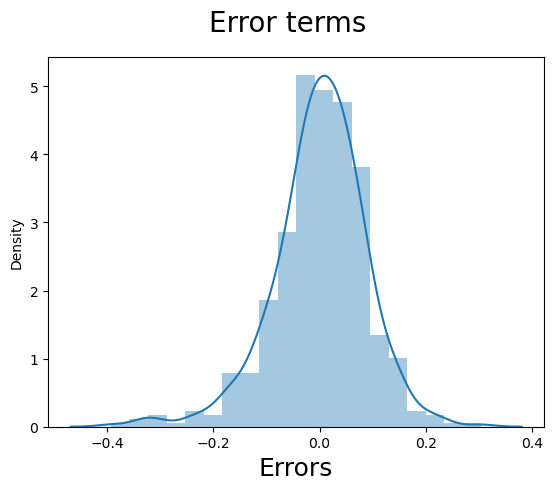

In [64]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle("Error terms",fontsize=20)
plt.xlabel("Errors",fontsize=18)

#### Making Predictions
##### Applying the scaling on the test sets

In [66]:
df_test[num_cols]=scaler.transform(df_test[num_cols])

##### Divinding into X_test and y_test

In [68]:
y_test=df_test.pop("cnt")
X_test=df_test

In [69]:
X_train_lm3.drop(["const"],axis=1,inplace=True)

In [70]:
# now lets use our model to make preparations.
# Creating X_test_new dataframe by dropping variables from X_test 
X_test_new=X_test[X_train_lm3.columns]

# Adding a constant variable
X_test_new=sm.add_constant(X_test_new)

In [71]:
y_pred=lm.predict(X_test_new)

#### Homoscedasticity

In [73]:
residual = y_train-y_pred 

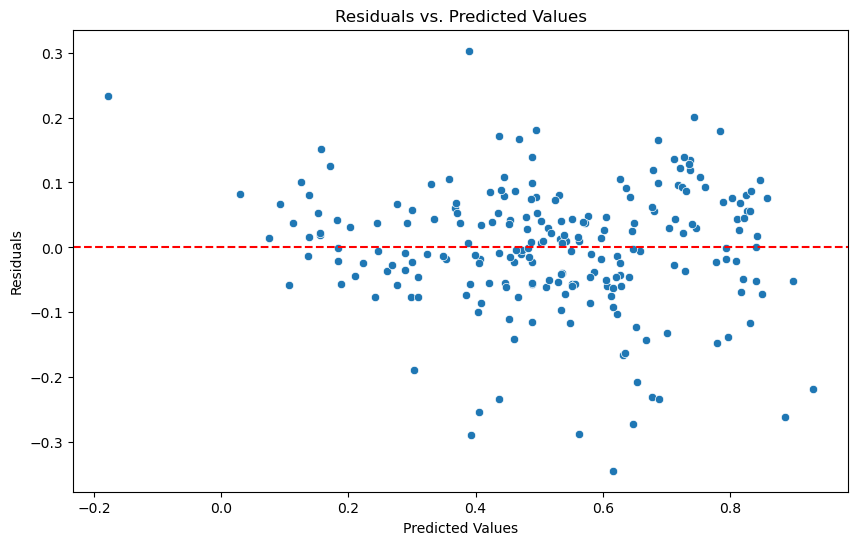

In [160]:
#2 Assumption of Error Terms Being Independent

plt.figure(figsize=(10, 6))
sns.scatterplot(x=(y_pred),y=(y_test)-(y_pred))
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

#### Model Evaluation

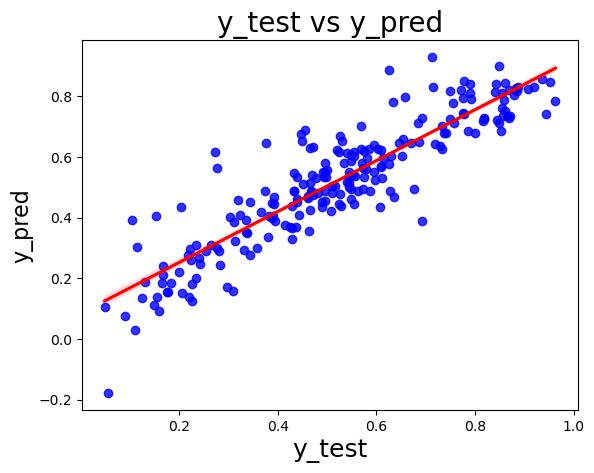

In [76]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [77]:
from sklearn.metrics import r2_score

In [78]:
# evaluate
r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

0.8053484636863372


In [79]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = round(1 - (1 - r2) * (n - 1) / (n - p - 1), 4)

print("Adjusted R²:", adjusted_r2)

Adjusted R²: 0.7756


cnt = 0.201084 + 0.229383 X yr - 0.059602 X holiday + 0.043697 X workingday + 0.567564 X temp -0.165855 X hum - 0.193489 X windspeed - 0.243321 X Lightrain -0.054144 X Mist + 0.053853 X sat + 0.0757048 X summer + 0.125538 X winter - 0.039348 X jan - 0.044250 X july + 0.092822 X sep

#### Comparision between Training and Testing dataset:# 
- Train dataset R^2           : 0.0846
- Test dataset R^2           .:0. 8058
- Train dataset Adjusted 2  R2  0.8428 #   
- Test dataset Adjuste^2d   R2  0.7757944

##### Demand of bikes depends on year, holiday, workingday, temp, humidity, windspeed, lightrain, Mist, saturday, summer,winter, jan, july and sept